In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import tree
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

# Airline Passenger Satisfaction

- **Gender**: Gender of the passengers (Female, Male)

- **Customer Type**: The customer type (Loyal customer, disloyal customer)

- **Age**: The actual age of the passengers

- **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

- **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

- **Flight distance**: The flight distance of this journey

- **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

- **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

- **Ease of Online booking**: Satisfaction level of online booking

- **Gate location**: Satisfaction level of Gate location

- **Food and drink**: Satisfaction level of Food and drink

- **Online boarding**: Satisfaction level of online boarding

- **Seat comfort**: Satisfaction level of Seat comfort

- **Inflight entertainment**: Satisfaction level of inflight entertainment

- **On-board service**: Satisfaction level of On-board service

- **Leg room service**: Satisfaction level of Leg room service

- **Baggage handling**: Satisfaction level of baggage handling

- **Check-in service**: Satisfaction level of Check-in service

- **Inflight service**: Satisfaction level of inflight service

- **Cleanliness**: Satisfaction level of Cleanliness

- **Departure Delay in Minutes**: Minutes delayed when departure

- **Arrival Delay in Minutes**: Minutes delayed when Arrival

- **Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI-Python/week5(08.05.2021)/Exercises/Airline_2.csv')
df.shape

(64940, 23)

In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,69,Personal Travel,Eco,762,3,3,3,4,3,4,4,2,2,3,2,2,2,2,0,0.0,neutral or dissatisfied
1,Female,Loyal Customer,37,Business travel,Eco,102,4,5,5,5,4,4,4,4,4,4,1,4,2,4,0,0.0,neutral or dissatisfied
2,Male,disloyal Customer,26,Business travel,Business,2475,1,2,2,1,2,1,1,4,3,5,5,1,3,1,0,6.0,neutral or dissatisfied
3,Female,Loyal Customer,47,Personal Travel,Eco,628,2,4,2,2,2,5,1,5,5,2,2,5,5,5,0,0.0,neutral or dissatisfied
4,Male,disloyal Customer,27,Business travel,Eco,1034,2,2,2,1,2,2,2,3,1,4,2,2,3,2,160,134.0,neutral or dissatisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64940 entries, 0 to 64939
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             64940 non-null  object 
 1   Customer Type                      64940 non-null  object 
 2   Age                                64940 non-null  int64  
 3   Type of Travel                     64940 non-null  object 
 4   Class                              64940 non-null  object 
 5   Flight Distance                    64940 non-null  int64  
 6   Inflight wifi service              64940 non-null  int64  
 7   Departure/Arrival time convenient  64940 non-null  int64  
 8   Ease of Online booking             64940 non-null  int64  
 9   Gate location                      64940 non-null  int64  
 10  Food and drink                     64940 non-null  int64  
 11  Online boarding                    64940 non-null  int

**ตรวจสอบ categorical ว่าประกอบไปด้วยอะค่าไรบ้าง**

In [ ]:
print(df.Gender.unique())
print(df['Customer Type'].unique())
print(df['Type of Travel'].unique())
print(df['Class'].unique())
print(df.satisfaction.unique())

['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco' 'Business' 'Eco Plus']
['neutral or dissatisfied' 'satisfied']


**แปลง categorical เป็น numerical**
```
Gender: 'Male':1, 'Female':0
Customer Type: 'Loyal Customer':1, 'disloyal Customer':0
Type of Travel: 'Business travel':1, 'Personal Travel'
satisfaction: 'satisfied':1, 'neutral or dissatisfied':0
```

In [ ]:
df.replace(['Male', 'Female'], [1, 0], inplace=True)
df.replace(['Loyal Customer','disloyal Customer'], [1, 0], inplace=True)
df.replace(['Business travel', 'Personal Travel'], [1, 0], inplace=True)
df.replace(['satisfied', 'neutral or dissatisfied'], [1, 0], inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,69,0,Eco,762,3,3,3,4,3,4,4,2,2,3,2,2,2,2,0,0.0,0
1,0,1,37,1,Eco,102,4,5,5,5,4,4,4,4,4,4,1,4,2,4,0,0.0,0
2,1,0,26,1,Business,2475,1,2,2,1,2,1,1,4,3,5,5,1,3,1,0,6.0,0
3,0,1,47,0,Eco,628,2,4,2,2,2,5,1,5,5,2,2,5,5,5,0,0.0,0
4,1,0,27,1,Eco,1034,2,2,2,1,2,2,2,3,1,4,2,2,3,2,160,134.0,0


**ทำ ont-hot encoding สำหรับ `class`**

In [ ]:
def one_hot_encode(_dataframe, list_of_columns_to_one_hot_encode):
    for column in list_of_columns_to_one_hot_encode:
        # one-hot-encode this column
        one_hot_encoded_values = pd.get_dummies(_dataframe[column], prefix=column)

        # join the one-hot-encoded values with original dataframe
        _dataframe = pd.concat([_dataframe, one_hot_encoded_values], axis=1)

        # drop the original column, we don't need it anymore
        _dataframe.drop([column], axis=1, inplace=True)
    
    return _dataframe

# get a list of all columns with categorical values
categorical_columns = df.select_dtypes(exclude=['int', 'float']).columns

df = one_hot_encode(df, categorical_columns)
df.head()

#df = pd.get_dummies(df, prefix='class', column=['Class'])

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,69,0,762,3,3,3,4,3,4,4,2,2,3,2,2,2,2,0,0.0,0,0,1,0
1,0,1,37,1,102,4,5,5,5,4,4,4,4,4,4,1,4,2,4,0,0.0,0,0,1,0
2,1,0,26,1,2475,1,2,2,1,2,1,1,4,3,5,5,1,3,1,0,6.0,0,1,0,0
3,0,1,47,0,628,2,4,2,2,2,5,1,5,5,2,2,5,5,5,0,0.0,0,0,1,0
4,1,0,27,1,1034,2,2,2,1,2,2,2,3,1,4,2,2,3,2,160,134.0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64940 entries, 0 to 64939
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             64940 non-null  int64  
 1   Customer Type                      64940 non-null  int64  
 2   Age                                64940 non-null  int64  
 3   Type of Travel                     64940 non-null  int64  
 4   Flight Distance                    64940 non-null  int64  
 5   Inflight wifi service              64940 non-null  int64  
 6   Departure/Arrival time convenient  64940 non-null  int64  
 7   Ease of Online booking             64940 non-null  int64  
 8   Gate location                      64940 non-null  int64  
 9   Food and drink                     64940 non-null  int64  
 10  Online boarding                    64940 non-null  int64  
 11  Seat comfort                       64940 non-null  int

**ตรวจสอบว่าข้อมูลมีค่าว่างหรือไม่**

In [ ]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             201
satisfaction                           0
Class_Business                         0
Class_Eco                              0
Class_Eco Plus  

In [ ]:
# Drop nan values
df = df.dropna().reset_index(drop=True)
df.shape

(64739, 25)

**ดูความสัมพันธ์ระหว่างตัวแปร Spearman's Correlation**

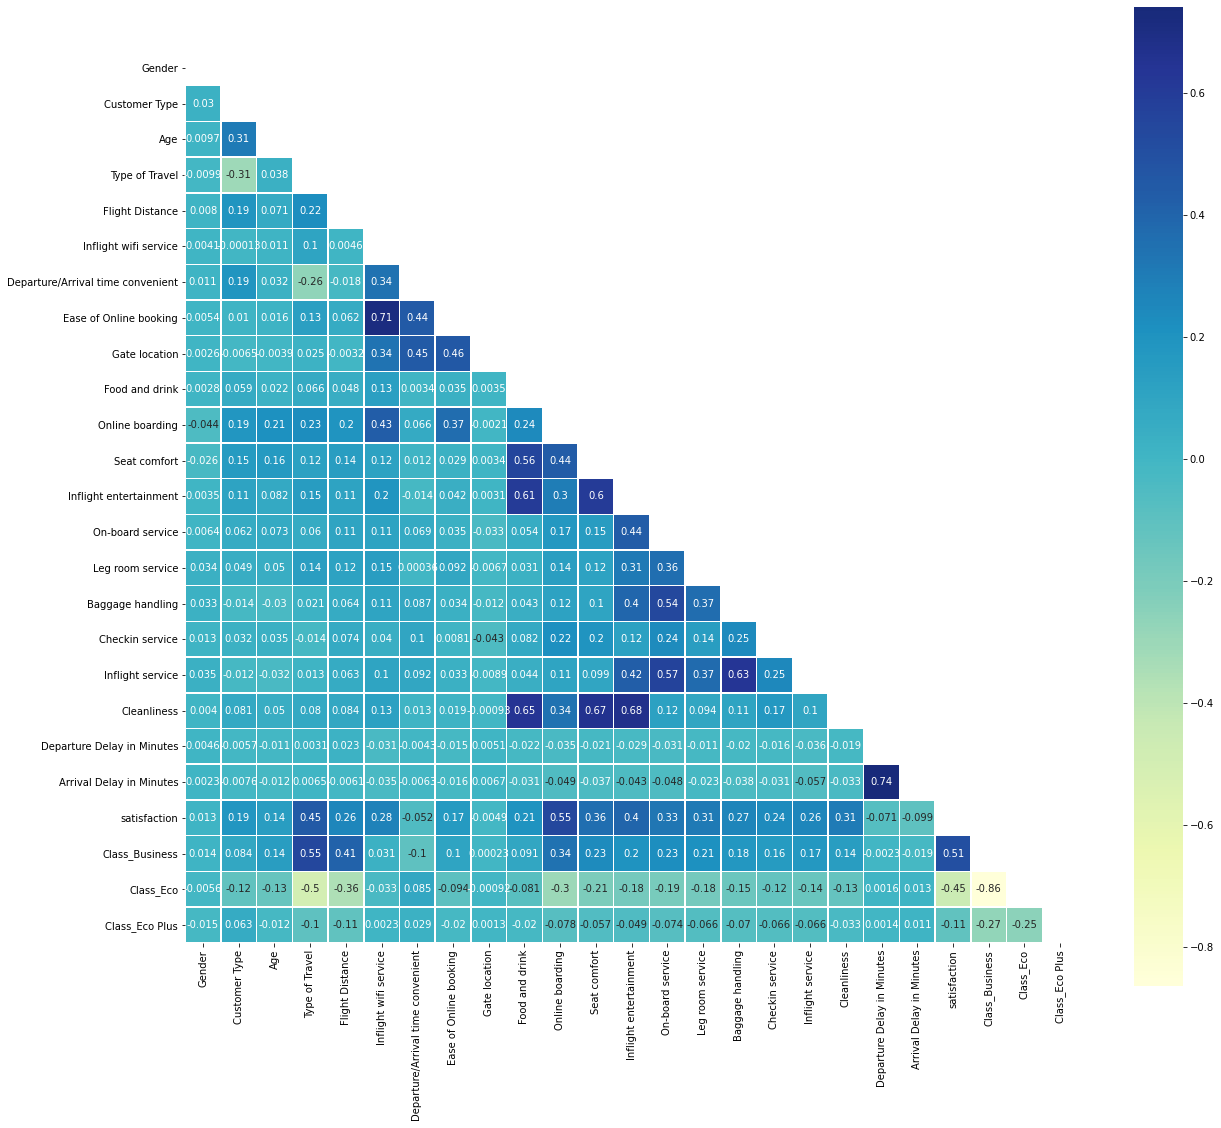

In [ ]:
corr = df.corr(method='spearman')  # มีข้อมูลส้วนใหญ่เป็นเชิ้งคุณภาพ
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

# Train Test Split

Y คือ satisfaction

In [ ]:
X = df.drop('satisfaction', axis=1)
y = df.satisfaction

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

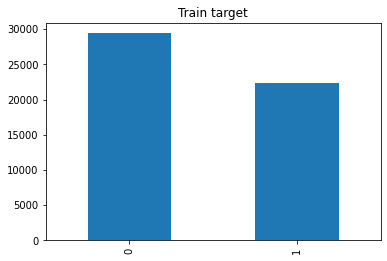

In [ ]:
plt.title('Train target')
y_train.value_counts().plot(kind='bar')

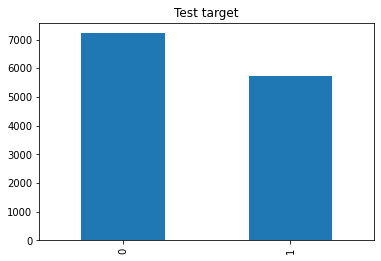

In [ ]:
plt.title('Test target')
y_test.value_counts().plot(kind='bar')

In [ ]:
x_train

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
31364,1,1,27,0,983,3,4,3,1,1,3,2,1,5,2,5,4,5,1,0,0.0,0,1,0
10679,0,1,47,1,1041,2,2,2,2,1,4,4,2,2,2,2,2,2,2,4,20.0,0,1,0
49277,1,1,44,1,3795,5,5,5,5,3,5,5,4,4,4,4,4,4,3,0,0.0,1,0,0
32300,1,1,9,0,1035,2,4,2,3,5,2,5,5,3,3,4,5,4,5,12,0.0,0,1,0
44069,0,1,41,1,2084,1,1,1,1,5,5,4,4,4,5,4,4,4,5,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,1,1,55,0,374,4,4,4,1,3,4,3,3,5,4,4,3,5,3,0,0.0,0,1,0
50496,1,1,60,1,1635,2,2,2,2,3,5,5,4,4,4,4,4,4,3,0,3.0,1,0,0
29199,0,0,26,1,631,4,2,4,3,5,4,5,5,1,4,4,1,4,5,0,0.0,0,1,0
40061,0,1,41,1,1657,2,2,2,2,5,4,5,4,4,4,4,5,4,4,0,0.0,1,0,0


**Plot histogram สำหรับทุก features**

IndexError: ignored

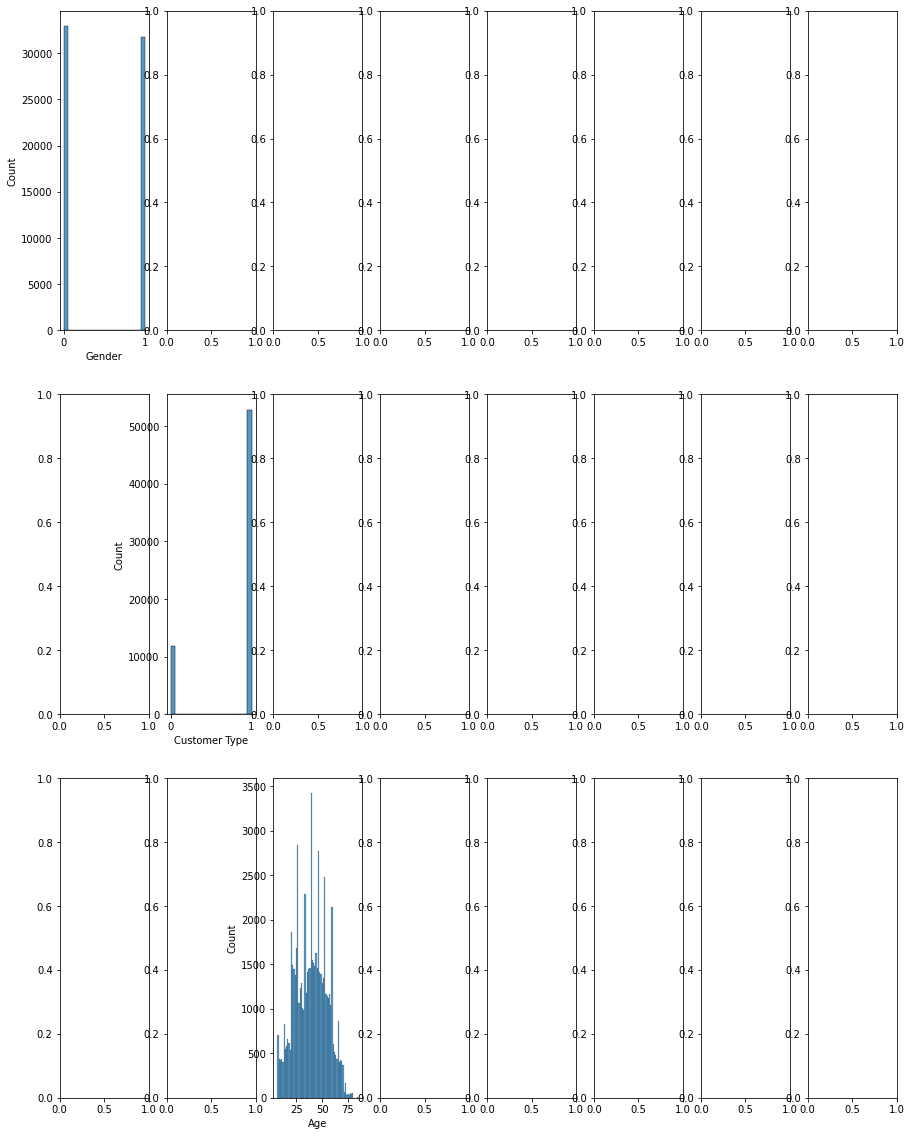

In [ ]:
#histogram
fig, axs = plt.subplots(ncols=8, nrows=3, figsize=(15, 20))
new_df = df.drop('satisfaction', axis=1)

for index, col in enumerate(new_df.columns):
  i = index % 8
  j = index % 3
  sns.histplot(data=new_df[col], ax= axs[i,j])
plt.subplot_adjust(hspace = 0.5)


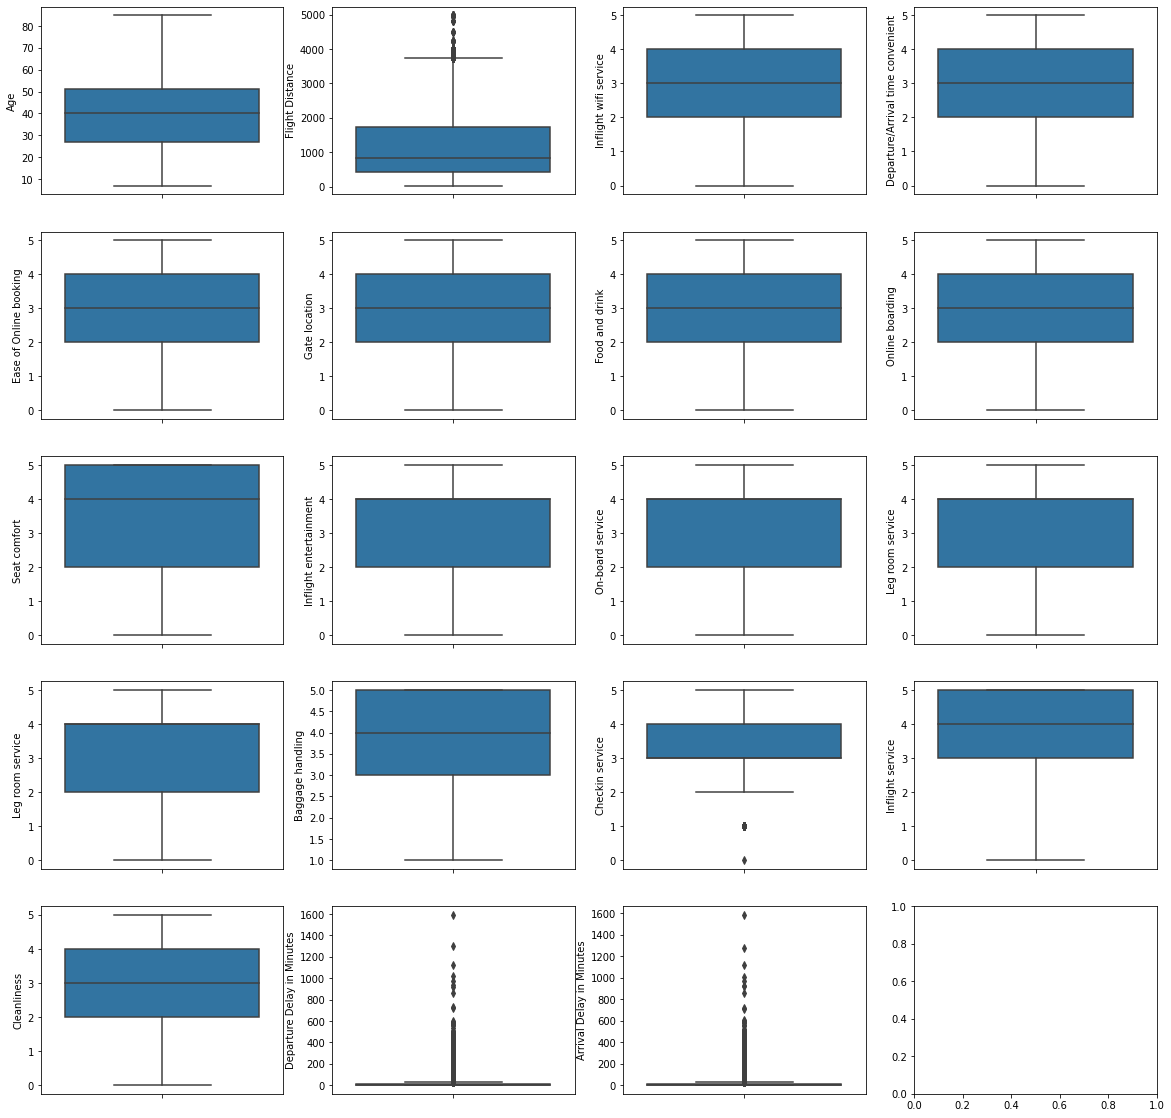

In [ ]:
# Your code here  เพื่อดูว่าข้อมูล normal และมี outlier หรือเปล่า
fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k in ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
          'Food and drink', 'Online boarding','Seat comfort', 'Inflight entertainment', 'On-board service','Leg room service', 'Leg room service',
          'Baggage handling','Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes','Arrival Delay in Minutes']:
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1

***

# Logistic regression

**Train model Ligistic Regression โดยกำหนด solver='liblinear'**

In [ ]:
# Create model - use solver='liblinear'
clf_lr = LogisticRegression(random_state=0, solver='liblinear')

# Train model
clf_lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

**คำนวณ Cross-validation**

In [ ]:
# Predict
lr_y_pred = clf_lr.predict(x_test)

print(f'Test data accuracy score: {np.round(clf_lr.score(x_test, y_test), 2)*100}%')
print(f'Cross val score: {np.mean(cross_val_score(clf_lr, X, y, cv=5, n_jobs=-1)).round(2)}')

Test data accuracy score: 87.0%
Cross val score: 0.87


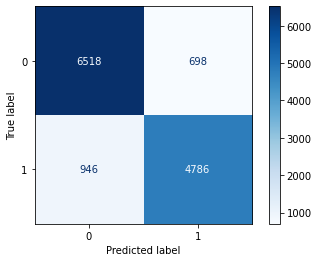

In [ ]:
# Confusion matrix
plot_confusion_matrix(clf_lr, x_test, y_test, cmap='Blues', values_format='d')

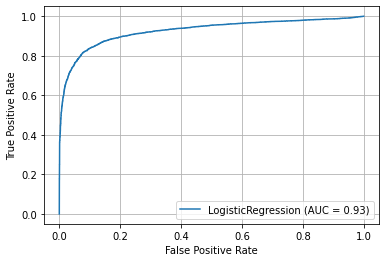

In [ ]:
# AUC ROC curve
plot_roc_curve(clf_lr, x_test, y_test)
plt.grid()

In [ ]:
clf_lr.coef_

array([[ 5.79747434e-02,  1.99151065e+00, -9.03320642e-03,
         2.70999754e+00, -3.16528829e-05,  3.85197116e-01,
        -1.27200376e-01, -1.67526978e-01,  3.46927700e-02,
        -4.41854860e-02,  6.01797381e-01,  5.91934681e-02,
         9.52964276e-02,  2.94408976e-01,  2.49172776e-01,
         1.09799249e-01,  3.46440361e-01,  1.14470469e-01,
         2.23196561e-01,  5.07560753e-03, -1.00576968e-02,
        -2.18631738e+00, -2.93080553e+00, -3.02765232e+00]])

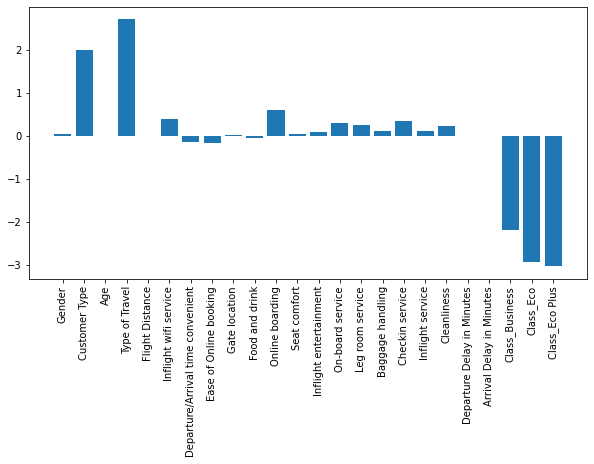

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(x_train.columns, clf_lr.coef_[0])
plt.xticks(rotation=90)
plt.show()

# Decission Tree

**Train model Decision Tree**

In [ ]:
# Create model
clf_dt = DecisionTreeClassifier(random_state=10)
# Train model
clf_dt = clf_dt.fit(x_train, y_train)

# Predict
dt_y_pred = clf_dt.predict(x_test)

**คำนวณ Cross-validation**

In [ ]:
print(f'Test data accuracy score: {np.round(clf_dt.score(x_test, y_test), 2)*100}%')   
dt_cross_val = cross_val_score(clf_dt, X, y, cv=10, n_jobs=-1) 
print('Cross val score') 
for i in range(len(dt_cross_val)):    
    print(f' Fold {i+1}: {dt_cross_val[i]}') 
print(f'Mean Cross val score: {np.mean(dt_cross_val)}')

Test data accuracy score: 94.0%
Cross val score
 Fold 1: 0.946555452579549
 Fold 2: 0.9389867160951498
 Fold 3: 0.9490268767377201
 Fold 4: 0.9388322520852641
 Fold 5: 0.9482545566882916
 Fold 6: 0.9406858202038925
 Fold 7: 0.9477911646586346
 Fold 8: 0.9445474204510349
 Fold 9: 0.9406858202038925
 Fold 10: 0.9493279777537463
Mean Cross val score: 0.9444694057457175


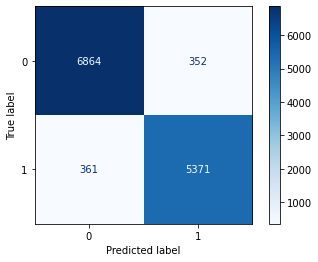

In [ ]:
# Confusion matrix
plot_confusion_matrix(clf_dt, x_test, y_test, cmap='Blues', values_format='d')

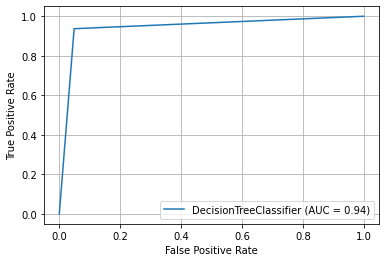

In [ ]:
# Plot AUC curve
plot_roc_curve(clf_dt, x_test, y_test)
plt.grid()

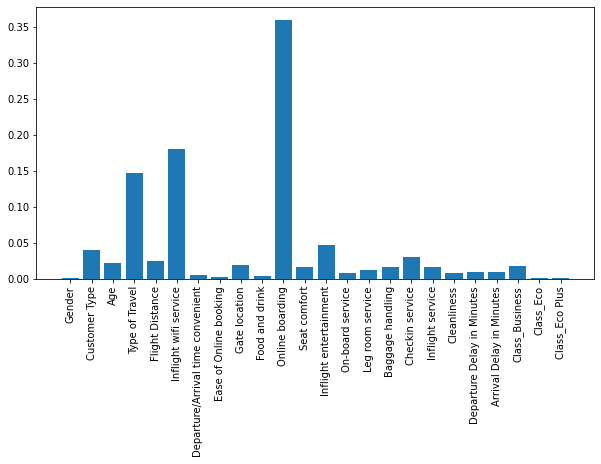

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(x_train.columns, clf_dt.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(f'Test data accuracy score: {np.round(clf_dt_2.score(x_test_filter, y_test), 2)*100}%')
dt_cross_val = cross_val_score(clf_dt_2, X_filter, y, cv=10, n_jobs=-1)

print('Cross val score')
for i in range(len(dt_cross_val)):
    print(f' Fold {i+1}: {dt_cross_val[i]}')
print(f'Mean Cross val score: {np.mean(dt_cross_val)}')

ValueError: ignored

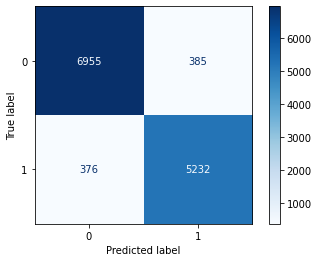

In [ ]:
# Confusion matrix
plot_confusion_matrix(clf_dt_2, x_test_filter, y_test, cmap='Blues', values_format='d')

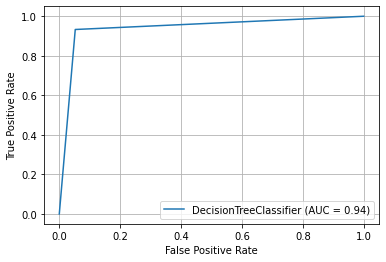

In [ ]:
plot_roc_curve(clf_dt_2, x_test_filter, y_test)
plt.grid()

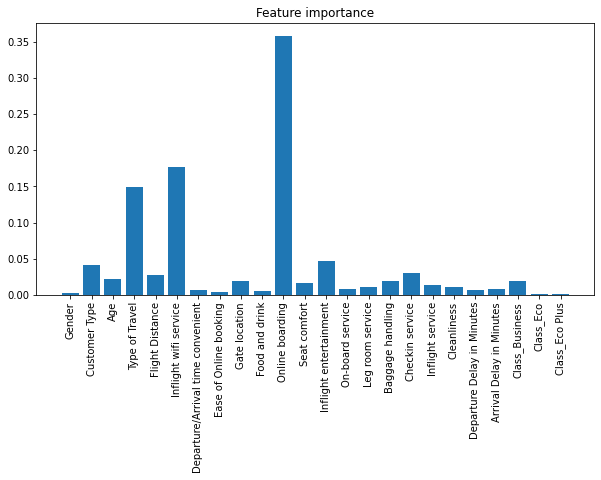

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(x_train_filter.columns, clf_dt_2.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()